In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates, radviz

In [2]:
# Load the data
data_url = 'data/EPA_fuel_economy.csv'

epa_df = pd.read_csv(data_url)

# Preview the data
epa_df.head()

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
0,Acura,NSX,2000,6.0,Automatic 4-spd,3.0,Two Seaters,-1,18.311667,2600,Premium,22,15,18
1,Acura,NSX,2000,6.0,Manual 6-spd,3.2,Two Seaters,-1,18.311667,2600,Premium,22,15,18
2,BMW,M Coupe,2000,6.0,Manual 5-spd,3.2,Two Seaters,-1,17.347895,2500,Premium,23,17,19
3,BMW,Z3 Coupe,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
4,BMW,Z3 Coupe,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19


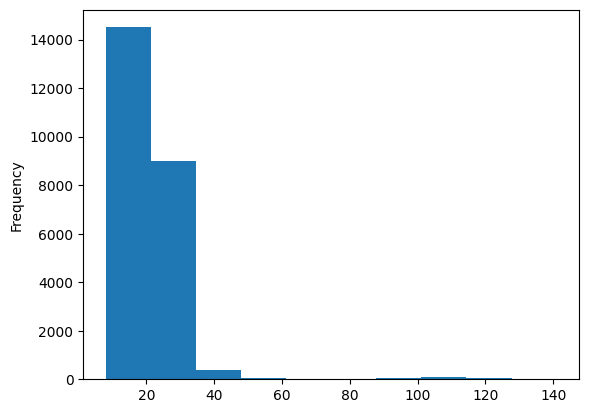

In [5]:
# Histograms

(
    epa_df
    # Plotting a histogram of the comb08 column
    ['comb08'].plot.hist()
);

<AxesSubplot: >

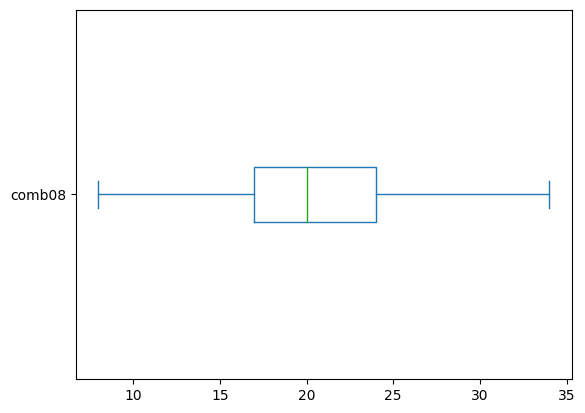

In [9]:
# Plotting a box plot

(
    epa_df
    # A box plot of comb08
    ['comb08'].plot.box(showfliers=False, vert=False)
)

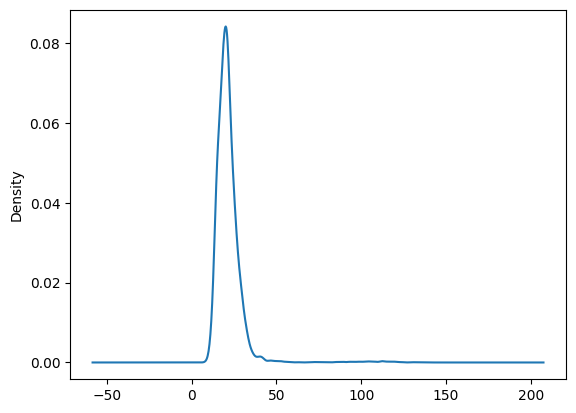

In [11]:
# The Kernel Density plot
(
    epa_df
    # A KDE Plot
    ['comb08'].plot.kde()
);

<AxesSubplot: xlabel='year'>

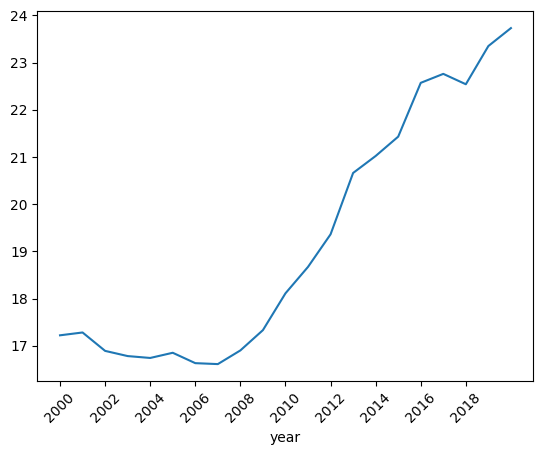

In [22]:
# Average Fuel Efficiency per year

(
    epa_df
    # Group by Year
    .groupby(by='year')
    # Aggregate the city mpg
    ['city08'].mean().round(2)
    # Plot a lineplot
    .plot(kind='line', xticks=np.arange(2000,2020,2), rot=45)
)

<AxesSubplot: >

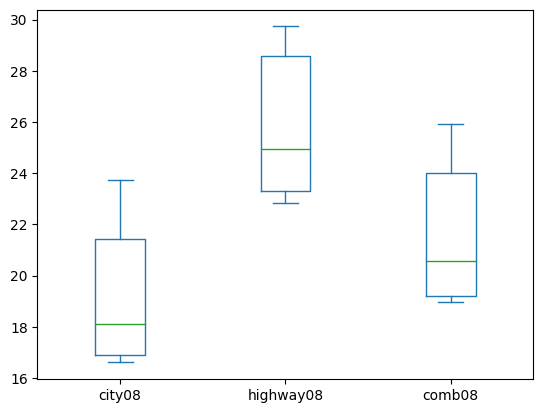

In [19]:
(
    epa_df
    # Group by Year
    .groupby(by='year')
    # Aggregate the city mpg
    [['city08', 'highway08', 'comb08']].mean().round(2)
    # Plot a lineplot
    .plot.box()
)

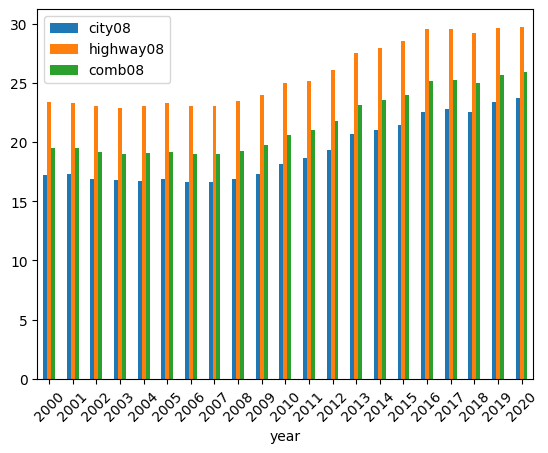

In [25]:
# Barplot
(
    epa_df
    # Group by Year
    .groupby(by='year')
    # Aggregate the city mpg
    [['city08', 'highway08', 'comb08']].mean().round(2)
    # Plot a lineplot
    .plot.bar(rot=45)
);

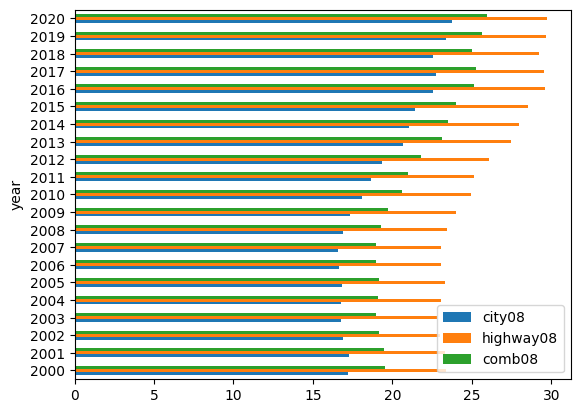

In [28]:
# Barplot
(
    epa_df
    # Group by Year
    .groupby(by='year')
    # Aggregate the city mpg
    [['city08', 'highway08', 'comb08']].mean().round(2)
    # Plot a lineplot
    .plot.barh()
);

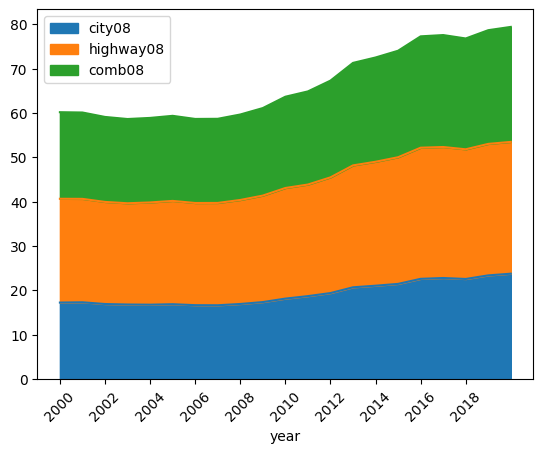

In [29]:
# Area Plot
(
    epa_df
    # Group by Year
    .groupby(by='year')
    # Aggregate the city mpg
    [['city08', 'highway08', 'comb08']].mean().round(2)
    # Plot a lineplot
    .plot.area(xticks=np.arange(2000,2020,2), rot=45)
);

[Text(0, 0.5, 'MPG'), Text(0.5, 1.0, 'Average MPG by Year')]

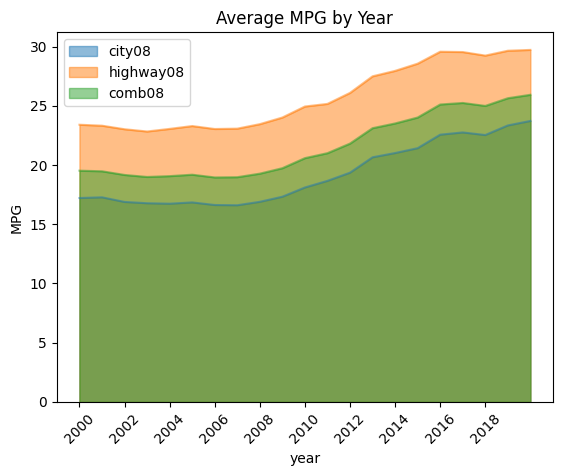

In [30]:
fig, ax1 = plt.subplots()

# Area Plot
(
    epa_df
    # Group by Year
    .groupby(by='year')
    # Aggregate the city mpg
    [['city08', 'highway08', 'comb08']].mean().round(2)
    # Plot a lineplot
    .plot.area(xticks=np.arange(2000,2020,2), ax=ax1, rot=45, stacked=False)
);
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:0.0f}'))
ax1.set(ylabel='MPG', title='Average MPG by Year')

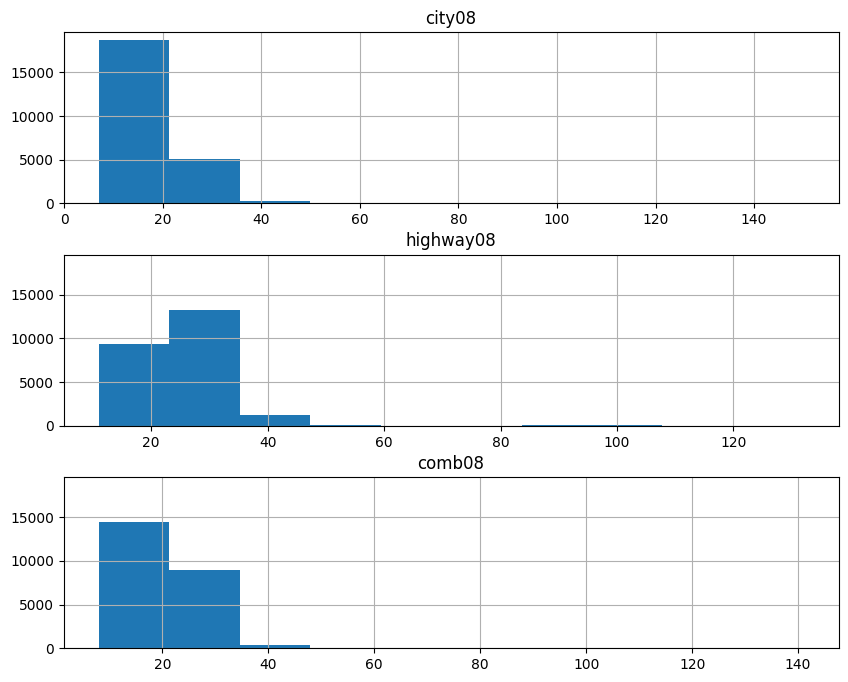

In [32]:
# Special Histogram and Boxplot Functions

epa_df.hist(column=['city08', 'highway08', 'comb08'], figsize=(10,8),
            sharey=True, layout=(3,1));

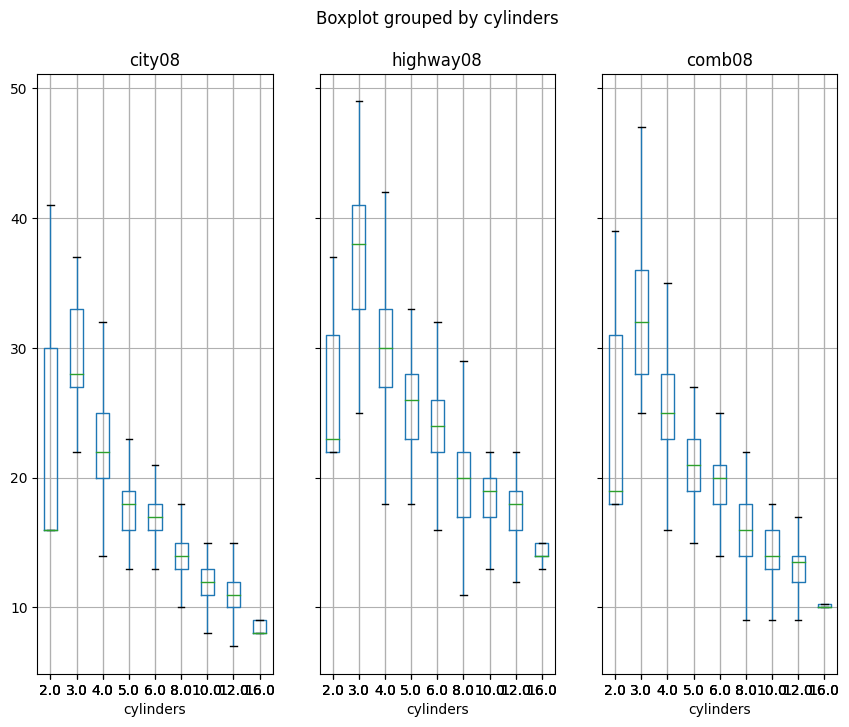

In [34]:
epa_df.boxplot(column=['city08', 'highway08', 'comb08'], by='cylinders', figsize=(10,8),
            sharey=True, layout=(1,3), showfliers=False);

## The Scatter Matrix


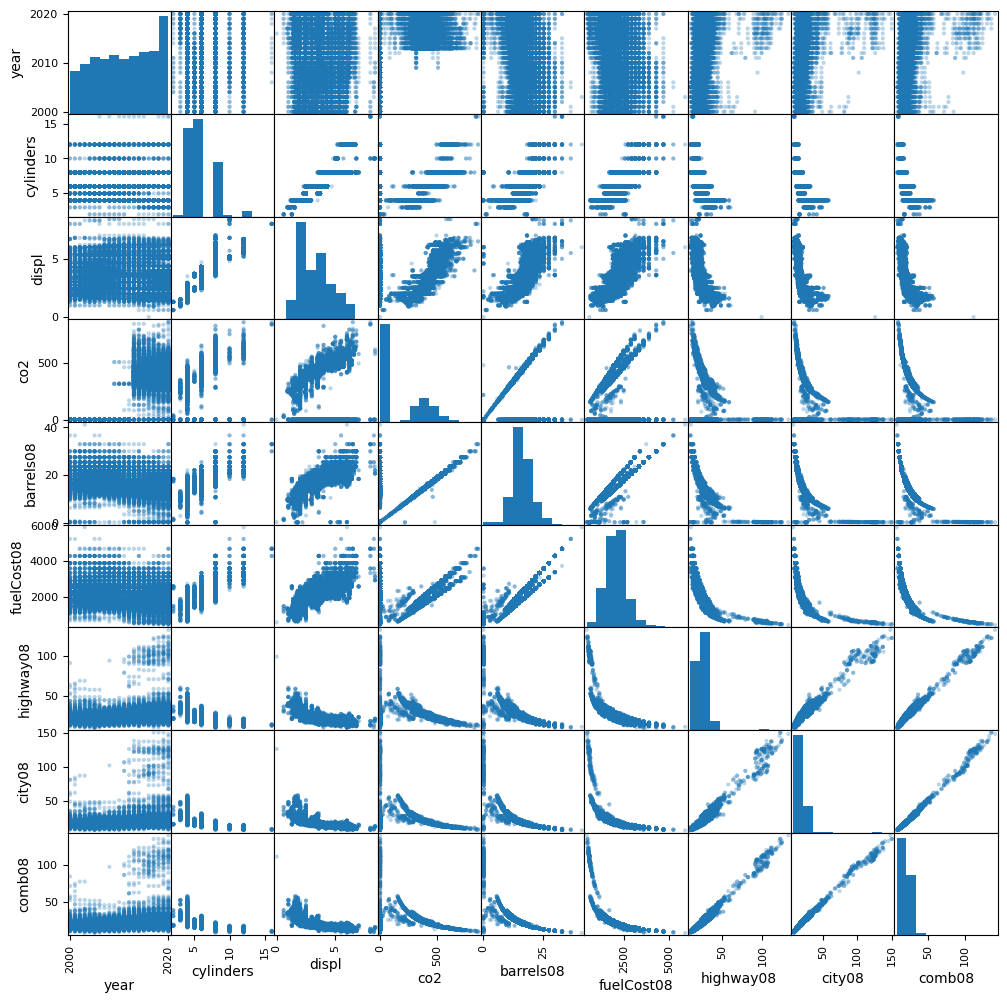

In [37]:
scatter_matrix(epa_df, alpha=0.3, figsize=(12,12));

In [39]:
car_class_df = (
    epa_df
    # Filter the car class
    .loc[(epa_df['VClass'].isin(['Compact Cars', 'Midsize Cars', 'Subcompact Cars', 'Large Cars']))]
               )

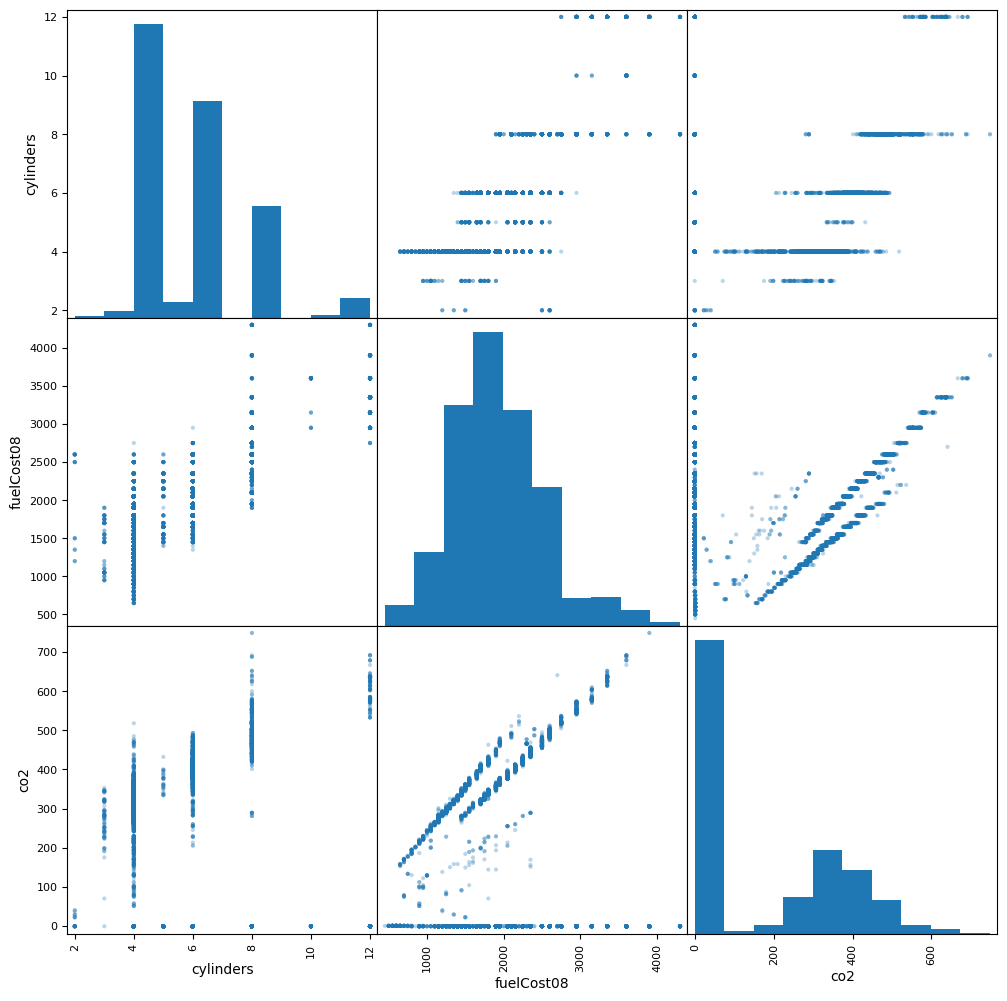

In [44]:
scatter_matrix(car_class_df[['cylinders', 'fuelCost08', 'co2']], alpha=0.3, figsize=(12,12));

## Andrews Curve

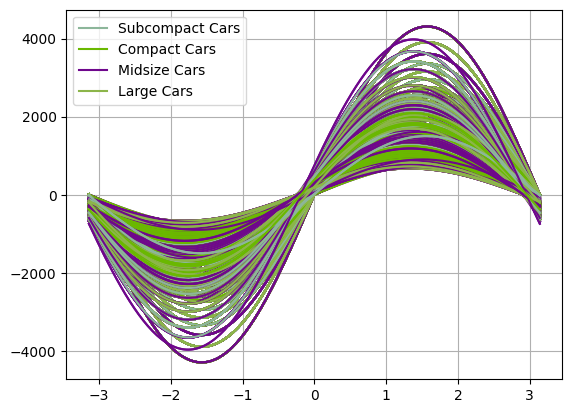

In [47]:
fig, ax1 = plt.subplots()

andrews_curves(car_class_df[['cylinders', 'fuelCost08', 'co2', 'VClass']], 'VClass', ax=ax1)

ax1.legend(loc='upper left')

## RadViz Visualization 

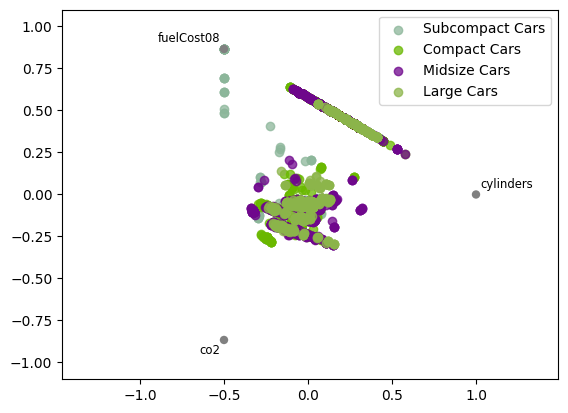

In [50]:
fig, ax1 = plt.subplots()

radviz(car_class_df[['cylinders', 'fuelCost08', 'co2', 'VClass']], 'VClass',alpha=0.75, ax=ax1);